In [23]:
# Veri Setini Yükleme.
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


In [24]:
# Veri işleme ve analizi için pandas yüklüyoruz.
import pandas as pd

# CSV Dosyasını okuma.
file_path = 'UCI_Credit_Card.csv'

# CSV dosyasını pandas kütüphanesi kullanarak yükler.
data = pd.read_csv(file_path)

# İlk 5 satırı görüntüleyin
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [25]:
# Eksik verileri doldurmak için SimpleImputer kullanıyoruz
from sklearn.impute import SimpleImputer

# Eksik verileri kontrol edelim
print(data.isnull().sum())

# İmpütasyon nesnesi oluşturuluyor (ortalama ile eksik veriler doldurulacak)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Eksik veriler düzenlendi
print(data_imputed.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                        

In [26]:
# Cinsiyet (SEX) değerlerini 0 (Erkek) ve 1 (Kadın) şekline dönüştürür.
data_imputed['SEX'] = data_imputed['SEX'].map({1: 0, 2: 1})

# Eğitim (EDUCATION) değerlerini  0'dan başlayan sıralı sayılarla ifadeler halien getirir.
data_imputed['EDUCATION'] = data_imputed['EDUCATION'].map({1: 0, 2: 1, 3: 2, 4: 3})

# Evli (MARRIAGE) değerlerini; Evli (0), bekar (1) ve diğer (2) olarak düzenler.
data_imputed['MARRIAGE'] = data_imputed['MARRIAGE'].map({1: 0, 2: 1, 3: 2})

# Son durumu kontrol edelim
data_imputed.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1.0,20000.0,1,1.0,0.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,1,1.0,1.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,1,1.0,1.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,1,1.0,0.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,0,1.0,0.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [27]:
# Verilerin özelliklerini standartlaştırmak için aşağıdaki kütüphaneyi kuruyoruz.
from sklearn.preprocessing import StandardScaler

# Ölçeklemek istediğimiz sütunları seçiyoruz (veri setindeki sayısal sütunlar)
features = data_imputed.drop(columns=['ID', 'default.payment.next.month'])

# StandardScaler ile ölçekleme (seçilen sayısal özellikler (features) üzerinde standartlaştırma işlemi yapıyoruz.)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Ölçeklenmiş veriyi bir DataFrame'e dönüştürüp, orijinal sütun isimlerini features.columns ile yeniden adlandırıyoruz.
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# İlk 5 satırı görelim
scaled_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.257055,-1.070264,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.257055,0.859304,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.257055,0.859304,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.257055,-1.070264,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.257055,-1.070264,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [28]:
import numpy as np

# Euclidean mesafe hesaplama fonksiyonu
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [7]:
# KNN sınıflandırma fonksiyonu
def knn(X_train, y_train, X_test, k):
    y_pred = []  # Tahmin edilen etiketleri saklayacak liste

    for test_point in X_test:  # Test verisindeki her örnek için işlem yap
        distances = []  # Mesafeleri saklayacağımız liste
        for i in range(len(X_train)):  # Eğitim verisindeki her örnekle mesafe hesapla
            distance = euclidean_distance(test_point, X_train[i])  # Mesafeyi hesapla
            distances.append((distance, y_train[i]))  # Mesafeyi ve etiketini sakla

        distances.sort(key=lambda x: x[0])  # Mesafeyi küçükten büyüğe sırala

        nearest_neighbors = distances[:k]  # En yakın k komşuyu seç

        labels = [neighbor[1] for neighbor in nearest_neighbors]  # Komşuların etiketlerini al
        prediction = max(set(labels), key=labels.count)  # En sık görüleni tahmin et
        y_pred.append(prediction)  # Tahmin edilen etiketi sakla

    return np.array(y_pred)  # Tahminleri döndür


In [10]:
from sklearn.model_selection import train_test_split  # Eğitim ve test verisi ayırma fonksiyonu için sklearn kütüphanesinden import ediliyor
from sklearn.metrics import accuracy_score  # Modelin doğruluğunu hesaplamak için accuracy_score import ediliyor
from collections import Counter  # Tahmin edilen sınıfların frekansını saymak için Counter sınıfı import ediliyor

# Veriyi eğitim ve test setine ayırma
X = data.drop('default.payment.next.month', axis=1).values  # 'default.payment.next.month' dışında kalan tüm özellikler
y = data['default.payment.next.month'].values  # 'default.payment.next.month' hedef değişkeni (sınıf etiketleri)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Veriyi %80 eğitim ve %20 test olarak ayırıyoruz

# k = 3 için Doğruluk Oranı: 72.73%
# k = 5 için Doğruluk Oranı: 74.22%
# K = 7 için Doğruluk Oranı: 75.57%
# K = 9 için Doğruluk Oranı: 76.25%
# K = 11 için Doğruluk Oranı: 76.72%
# K = 13 için Doğruluk Oranı: 76.78%
# K = 15 için Doğruluk Oranı: 76.90%
# K = 17 için Doğruluk Oranı: 76.87%

k = 15  # KNN modelindeki komşu sayısını 15 olarak belirliyoruz
y_pred = knn(X_train, y_train, X_test, k)  # KNN fonksiyonunu çağırarak test verisi için tahminler alıyoruz

# Sonuçları değerlendir
accuracy = accuracy_score(y_test, y_pred)  # Gerçek etiketlerle tahmin edilen etiketleri karşılaştırarak doğruluğu hesaplıyoruz
print(f"Doğruluk: {accuracy * 100:.2f}%")  # Doğruluk oranını yüzdelik olarak ekrana yazdırıyoruz

# En sık çıkan sınıfı bulma
counter = Counter(y_pred)  # Tahmin edilen sınıfların frekansını hesaplıyoruz
most_common_class = counter.most_common(1)[0][0]  # En sık çıkan sınıfı buluyoruz

if most_common_class == 1:  # Eğer en sık görülen sınıf 1 ise (Ödeyecek)
    print("Tahmin edilen çoğunluk sınıfı: Ödeyecek")  # Çoğunluk sınıfı 1 (Ödeyecek) olduğu belirtiliyor
else:  # Eğer en sık görülen sınıf 0 ise (Ödemeyecek)
    print("Tahmin edilen çoğunluk sınıfı: Ödemeyecek")  # Çoğunluk sınıfı 0 (Ödemeyecek) olduğu belirtiliyor

Doğruluk: 76.60%
Tahmin edilen çoğunluk sınıfı: Ödemeyecek


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      4687
           1       0.35      0.08      0.14      1313

    accuracy                           0.77      6000
   macro avg       0.57      0.52      0.50      6000
weighted avg       0.69      0.77      0.71      6000



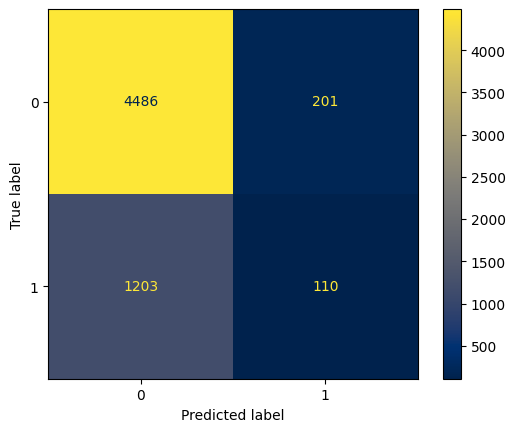

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification Report
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))  # Sınıflandırma raporunu oluştur

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)  # Gerçek ve tahmin edilen etiketlerle karışıklık matrisini oluştur
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Karışıklık matrisini görselleştirmek için bir nesne oluştur
disp.plot(cmap='cividis')  # Karışıklık matrisini mavi renk tonlarıyla görselleştir

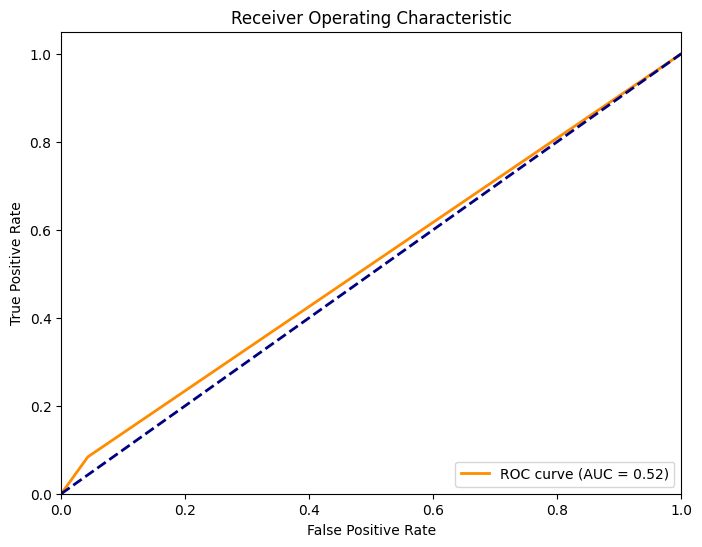

In [12]:
import matplotlib.pyplot as plt  # ROC eğrisini görselleştirmek için gerekli kütüphane

# ROC Curve için örnek
from sklearn.metrics import roc_curve, auc  # ROC eğrisi ve AUC metriği hesaplamak için gerekli fonksiyonlar

fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # ROC eğrisi için yanlış pozitif oran (FPR) ve doğru pozitif oran (TPR) hesaplanır
roc_auc = auc(fpr, tpr)  # ROC eğrisinin altındaki alan (AUC) hesaplanır

# ROC curve çizimi
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarla
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')  # ROC eğrisini çiz ve AUC değerini göster
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin için diagonal bir çizgi ekle
plt.xlim([0.0, 1.0])  # X ekseni sınırlarını belirle (Yanlış Pozitif Oran)
plt.ylim([0.0, 1.05])  # Y ekseni sınırlarını belirle (Doğru Pozitif Oran)
plt.xlabel('False Positive Rate')  # X ekseni başlığı
plt.ylabel('True Positive Rate')  # Y ekseni başlığı
plt.title('Receiver Operating Characteristic')  # Grafik başlığı
plt.legend(loc='lower right')  # Grafiğe açıklama ekle (sağ alt köşe)
plt.show()  # Grafiği ekranda göster

In [29]:
# KNN sınıflandırma fonksiyonu
def knn(X_train, y_train, X_test, k):
    y_pred = []  # Tahmin edilen etiketleri saklayacak liste

    for test_point in X_test:  # Test verisindeki her örnek için işlem yap
        distances = []  # Mesafeleri saklayacağımız liste
        for i in range(len(X_train)):  # Eğitim verisindeki her örnekle mesafe hesapla
            distance = euclidean_distance(test_point, X_train[i])  # Mesafeyi hesapla
            distances.append((distance, y_train[i]))  # Mesafeyi ve etiketini sakla

        distances.sort(key=lambda x: x[0])  # Mesafeyi küçükten büyüğe sırala

        nearest_neighbors = distances[:k]  # En yakın k komşuyu seç
###############################################################################################

        # Ağırlıklı etiketler: daha yakın komşular daha fazla ağırlığa sahip olacak
        labels = {} # Etiketlerin ağırlıklarını tutacak bir sözlük oluşturuluyor.
        for distance, label in nearest_neighbors: # Her bir komşunun mesafesi ve etiketi üzerinden dönülür.
            weight = 1 / (distance + 1e-5)  # Mesafeye ters orantılı ağırlık hesaplanır .
            if label in labels: # Eğer etiket zaten sözlükte varsa
                labels[label] += weight # Ağırlığı mevcut etikete ekle
            else:
                labels[label] = weight # Eğer etiket yoksa, yeni bir etiket olarak ekleyip ağırlığı ver.

        prediction = max(labels, key=labels.get)  # En yüksek ağırlığa sahip etiketi (sınıfı) tahmin olarak seç

###############################################################################################
        y_pred.append(prediction)  # Tahmin edilen etiketi sakla

    return np.array(y_pred)  # Tahminleri döndür

In [30]:
from sklearn.model_selection import train_test_split  # Eğitim ve test verisi ayırma fonksiyonu için sklearn kütüphanesinden import ediliyor
from sklearn.metrics import accuracy_score  # Modelin doğruluğunu hesaplamak için accuracy_score import ediliyor
from collections import Counter  # Tahmin edilen sınıfların frekansını saymak için Counter sınıfı import ediliyor

# Veriyi eğitim ve test setine ayırma
X = data.drop('default.payment.next.month', axis=1).values  # 'default.payment.next.month' dışında kalan tüm özellikler
y = data['default.payment.next.month'].values  # 'default.payment.next.month' hedef değişkeni (sınıf etiketleri)
###############################################################################################

# **Under-sampling** uygulama
from sklearn.utils import resample

# Çoğunluk ve azınlık sınıflarını ayırma
X_class_0 = X[y == 0]  # Çoğunluk sınıfına ait özellikler
X_class_1 = X[y == 1]  # Azınlık sınıfına ait özellikler
y_class_0 = y[y == 0]  # Çoğunluk sınıfına ait etiketler
y_class_1 = y[y == 1]  # Azınlık sınıfına ait etiketler

# Çoğunluk sınıfını azınlık sınıfına eşit olacak şekilde yeniden örnekleme (under-sampling)
X_class_0_resampled, y_class_0_resampled = resample(X_class_0, y_class_0,
                                                    n_samples=len(X_class_1),  # Azınlık sınıfı kadar örnek alınır
                                                    random_state=42)  # Rastgelelik kontrolü için sabit bir seed kullanılır
# Yeniden dengelenmiş veriyi oluşturma
X_resampled = np.vstack((X_class_0_resampled, X_class_1))  # Dengelenmiş X verilerini birleştiriyoruz
y_resampled = np.hstack((y_class_0_resampled, y_class_1))  # Dengelenmiş y etiketlerini birleştiriyoruz

# Eğitim ve test verisini tekrar ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2,  # Verinin %20'si test seti için ayrılır
                                                    random_state=42)  # Rastgelelik kontrolü

###############################################################################################

k = 15  # KNN modelindeki komşu sayısını 15 olarak belirliyoruz
y_pred = knn(X_train, y_train, X_test, k)  # KNN fonksiyonunu çağırarak test verisi için tahminler alıyoruz

# Sonuçları değerlendir
accuracy = accuracy_score(y_test, y_pred)  # Gerçek etiketlerle tahmin edilen etiketleri karşılaştırarak doğruluğu hesaplıyoruz
print(f"Doğruluk: {accuracy * 100:.2f}%")  # Doğruluk oranını yüzdelik olarak ekrana yazdırıyoruz

# En sık çıkan sınıfı bulma
counter = Counter(y_pred)  # Tahmin edilen sınıfların frekansını hesaplıyoruz
most_common_class = counter.most_common(1)[0][0]  # En sık çıkan sınıfı buluyoruz

if most_common_class == 1:  # Eğer en sık görülen sınıf 1 ise (Ödeyecek)
    print("Tahmin edilen çoğunluk sınıfı: Ödeyecek")  # Çoğunluk sınıfı 1 (Ödeyecek) olduğu belirtiliyor
else:  # Eğer en sık görülen sınıf 0 ise (Ödemeyecek)
    print("Tahmin edilen çoğunluk sınıfı: Ödemeyecek")  # Çoğunluk sınıfı 0 (Ödemeyecek) olduğu belirtiliyor

Doğruluk: 64.29%
Tahmin edilen çoğunluk sınıfı: Ödemeyecek


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      1324
           1       0.65      0.63      0.64      1331

    accuracy                           0.64      2655
   macro avg       0.64      0.64      0.64      2655
weighted avg       0.64      0.64      0.64      2655



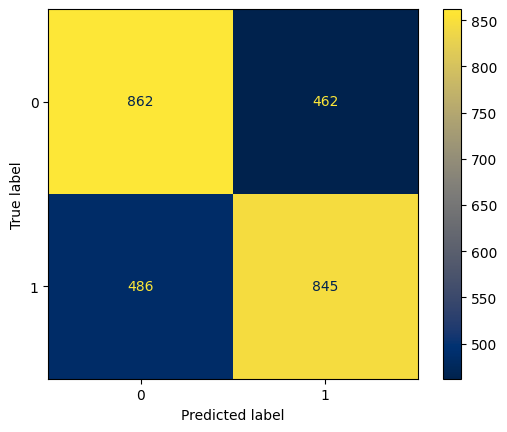

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification Report
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))  # Sınıflandırma raporunu oluştur

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)  # Gerçek ve tahmin edilen etiketlerle karışıklık matrisini oluştur
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Karışıklık matrisini görselleştirmek için bir nesne oluştur
disp.plot(cmap='cividis')  # Karışıklık matrisini mavi renk tonlarıyla görselleştir

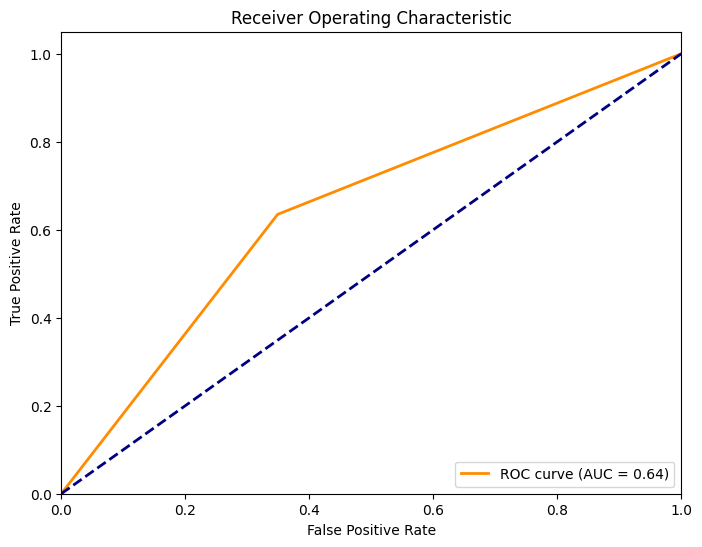

In [32]:
import matplotlib.pyplot as plt  # ROC eğrisini görselleştirmek için gerekli kütüphane

# ROC Curve için örnek
from sklearn.metrics import roc_curve, auc  # ROC eğrisi ve AUC metriği hesaplamak için gerekli fonksiyonlar

fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # ROC eğrisi için yanlış pozitif oran (FPR) ve doğru pozitif oran (TPR) hesaplanır
roc_auc = auc(fpr, tpr)  # ROC eğrisinin altındaki alan (AUC) hesaplanır

# ROC curve çizimi
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarla
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')  # ROC eğrisini çiz ve AUC değerini göster
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin için diagonal bir çizgi ekle
plt.xlim([0.0, 1.0])  # X ekseni sınırlarını belirle (Yanlış Pozitif Oran)
plt.ylim([0.0, 1.05])  # Y ekseni sınırlarını belirle (Doğru Pozitif Oran)
plt.xlabel('False Positive Rate')  # X ekseni başlığı
plt.ylabel('True Positive Rate')  # Y ekseni başlığı
plt.title('Receiver Operating Characteristic')  # Grafik başlığı
plt.legend(loc='lower right')  # Grafiğe açıklama ekle (sağ alt köşe)
plt.show()  # Grafiği ekranda göster